### C4021 - Group 4.2 
### Project work Weeks 7-9

#### Machine Learning Algorithm: Random Forests
Random Forests: 

-This article was a great source of help: https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd

-This implementation was also a useful reference: https://www.kaggle.com/niklasdonges/end-to-end-project-with-python



#### Dataset Information
_Source:_ https://www.kaggle.com/shrutimehta/nasa-asteroids-classification (source: Shruti Mehta)

**Content**
The data is about Asteroids - NeoWs. NeoWs (Near Earth Object Web Service) is a RESTful web service for near earth Asteroid information. With NeoWs a user can: search for Asteroids based on their closest approach date to Earth, lookup a specific Asteroid with its NASA JPL small body id, as well as browse the overall data-set.

**Acknowledgements**
Data-set: All the data is from the (http://neo.jpl.nasa.gov/). This API is maintained by SpaceRocks Team: David Greenfield, Arezu Sarvestani, Jason English and Peter Baunach.

**Inspiration**
Finding potential hazardous and non-hazardous asteroids
Features responsible for claiming an asteroid to be hazardous

#### Notebook Structure
1. Data Loading and Pre-processing
2. Model training and testing
3. Model graphing
4. Model analysis: further eaxamination of significant features etc.

#### Team Contributions:
**Training data**

29-OCT-2018 B.Parle Source data identified, loaded and initial analysis. The data field 'Hazardous' is the Classification output: i.e. Hazardous Y or N

30-OCT-2018 B.Parle This article suggests SVM might be better for a binary classification problem like the one I propose: https://www.datasciencecentral.com/profiles/blogs/how-to-choose-a-machine-learning-model-some-guidelines?linkId=58574007


**Pre-processing**

31-OCT-2018 B.Parle Removed unnecessary columns and features with single values


**Algorithm training and evaluation**

02-NOV-2018 B.Parle Added the Train and Test code, and calculated overall score


**Visualisation of outputs**

02-NOV-2018 B.Parle Graphed the feature importance using bulit-in plot capability in pandas

03-NOV-2018 B.Parle Added further visualisations to display the influence of the significant features of the model using values predicted using the original dataset.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
####################
#
# 1. Dataset Loading and Pre-processing
#
####################
nasa_data = pd.read_csv('nasa.csv')
nasa_data.head(5).dtypes
#nasa_data.describe()

Neo Reference ID                  int64
Name                              int64
Absolute Magnitude              float64
Est Dia in KM(min)              float64
Est Dia in KM(max)              float64
Est Dia in M(min)               float64
Est Dia in M(max)               float64
Est Dia in Miles(min)           float64
Est Dia in Miles(max)           float64
Est Dia in Feet(min)            float64
Est Dia in Feet(max)            float64
Close Approach Date              object
Epoch Date Close Approach         int64
Relative Velocity km per sec    float64
Relative Velocity km per hr     float64
Miles per hour                  float64
Miss Dist.(Astronomical)        float64
Miss Dist.(lunar)               float64
Miss Dist.(kilometers)          float64
Miss Dist.(miles)               float64
Orbiting Body                    object
Orbit ID                          int64
Orbit Determination Date         object
Orbit Uncertainity                int64
Minimum Orbit Intersection      float64


In [3]:
#Issues found during initial analysis that will need to be resolved:
#1. 2 columns contain repeated data: "Est Dia in KM(min)", "Est Dia in KM(max)" 
#.  are similar to these 2 fields: "Est Dia in M(min)", "Est Dia in M(max)"
#2. These fields are superflous: "Est Dia in Miles(max)","Est Dia in Feet(min)"
#3. 'object' data types that will need processing before they can be used in the learning model
#    Objects: Close Approach Date, Orbiting Body, Orbit Determination Date, Equinox

#1 and 2: drop extra columns with measurements in km, miles and inches
nasa_data = nasa_data.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)'], axis=1)

#3. Object types

#Close Approach Date: Drop this until we determine a use
nasa_data = nasa_data.drop(['Close Approach Date'], axis=1)

#Orbiting Body
nasa_data['Orbiting Body'].unique()

#Only 1 value in 'Orbiting body', so we can drop this column
nasa_data = nasa_data.drop(['Orbiting Body'], axis=1)

#Orbit Determination Date: Drop this until we determine a use
nasa_data = nasa_data.drop(['Orbit Determination Date'], axis=1)

#Equinox
nasa_data['Equinox'].unique()

#Only 1 value in 'Equinox', so we can drop this column
nasa_data = nasa_data.drop(['Equinox'], axis=1)

nasa_data.shape
#30 features and 4687 samples

(4687, 30)

In [4]:
####################
#
# 2. Train & Test
#
####################

#Take the result vector (y) into a separate dataframe 
# - the datatype is Bool so this should work ok with numeric models
nasa_data_y = nasa_data.iloc[::,29]
nasa_data_x = nasa_data.iloc[::,0:28]

#Prior to training, scale the data
nasa_data_x_scaled = preprocessing.scale(nasa_data_x)

#print('x scaled = {}'.format(nasa_data_x_scaled.shape))
#print('y = {}'.format(nasa_data_y.shape))

#Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(nasa_data_x_scaled, nasa_data_y, test_size=0.6, random_state=39)

#Fit the model
rfc = RandomForestClassifier(n_estimators=25, max_depth=None, random_state=33)
rfc.fit(X_train, y_train)

#score the model using the test dataset
rfc_score = rfc.score(X_test,y_test)
print('Overall score = {}%'.format(round(rfc_score * 100, 2)))
print('feature importances {}'.format(rfc.feature_importances_))

Overall score = 99.68%
feature importances [0.01897851 0.02243852 0.06055674 0.14705464 0.07736621 0.00889906
 0.00668711 0.01216538 0.01025752 0.00829913 0.00603762 0.00976817
 0.01146203 0.04231387 0.01936157 0.41873921 0.00862373 0.00099306
 0.0079175  0.00539427 0.02437717 0.00730608 0.00437251 0.03041987
 0.00612906 0.01060272 0.00585539 0.00762337]


/Users/brianparle/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


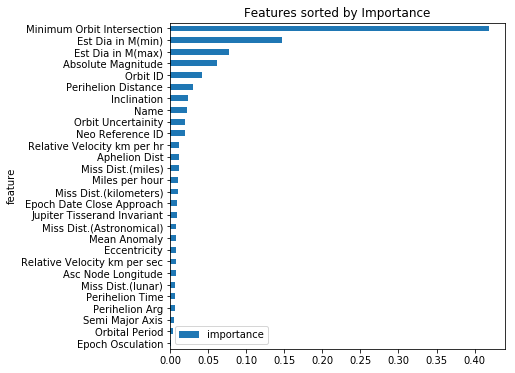

In [5]:
####################
#
# 3. Model Graphing
#
####################

#graph the feature_importances
importances = pd.DataFrame({'feature':nasa_data_x.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=True).set_index('feature')
importances.plot.barh(figsize=(6,6),title='Features sorted by Importance')

In [6]:
####################
#
# 4. Model Analysis
#
####################

#Generate a set or predictions using the original data set
nasa_data_y_predict = pd.DataFrame(rfc.predict(nasa_data_x_scaled))
nasa_data_y_predict.fillna(False)

,0
0,True
1,False
2,True
3,False
4,True
5,False
6,False
7,False
8,False
9,True


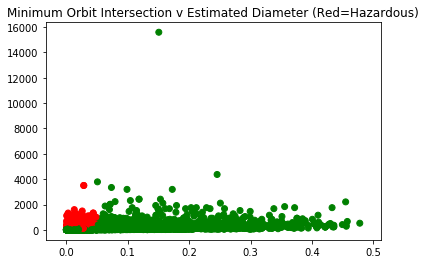

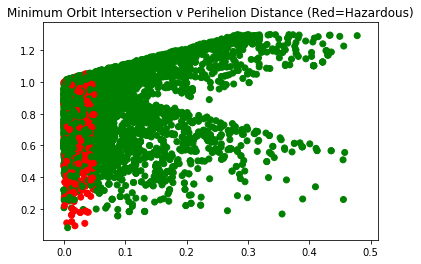

In [7]:
#the 'Minimum Orbit Intersection' and 'Est Dia in M(min)' are the most significant fields so let's 
#plot these against each other and colour with the result vector
myplt_colours = {'True':'green','False':'red'}
map_colour = lambda x: 'red' if x else 'green'
myplt_hazardous_colour=[]
for item in nasa_data_y_predict[0]:
   myplt_hazardous_colour.append(map_colour(item))
#now plot the data
_, myplt = plt.subplots()
myplt.set_title('Minimum Orbit Intersection v Estimated Diameter (Red=Hazardous)')
myplt.scatter(nasa_data['Minimum Orbit Intersection'], nasa_data['Est Dia in M(min)'], c=myplt_hazardous_colour)
_, myplt = plt.subplots()
myplt.set_title('Minimum Orbit Intersection v Perihelion Distance (Red=Hazardous)')
myplt.scatter(nasa_data['Minimum Orbit Intersection'], nasa_data['Perihelion Distance'], c=myplt_hazardous_colour)

#### Summary of observations
The most significant features of the model are, not unsurprisingly perhaps, the Minimum Orbit Intersection (with Earth orbit) and the Size of the Asteroid. The perihelion distance is also a useful feature, although as the second graph shows, it does not provide a distinct categorization for near earth orbit intersections.

A useful next step would be to define the boundary of the categories to aid with classification visualisation.